In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.optimize import curve_fit
from scipy.special import erf

from numpy import trapz
from scipy.integrate import simpson
from scipy.stats import skew, kurtosis
import matplotlib.dates as mdates

In [4]:
import os
output_folder = 'fit_plots'
os.makedirs(output_folder, exist_ok=True)

In [5]:
file_name='/content/drive/MyDrive/Monthly_mean_SN_number.txt'
with open(file_name,'r') as f:
  lines=f.readlines()
  data = [line.strip().split() for line in lines if line.strip()]

In [6]:
columns=["Year", "Month","year in fraction","SN","Standard Deviation","No fo observations","D"]

In [7]:
df=pd.DataFrame(data, columns=columns)
df

,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
0,1749,01,1749.042,96.7,-1.0,-1,None
1,1749,02,1749.123,104.3,-1.0,-1,None
2,1749,03,1749.204,116.7,-1.0,-1,None
3,1749,04,1749.288,92.8,-1.0,-1,None
4,1749,05,1749.371,141.7,-1.0,-1,None
...,...,...,...,...,...,...,...
3309,2024,10,2024.791,166.4,23.9,893,*
3310,2024,11,2024.873,152.5,20.9,681,*
3311,2024,12,2024.958,154.5,25.6,572,*
3312,2025,01,2025.042,137.0,23.3,670,*


In [8]:
df.insert(0, 'date', df['Year'].astype(str) + '-' + df['Month'].astype(str))
df

,date,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
0,1749-01,1749,01,1749.042,96.7,-1.0,-1,None
1,1749-02,1749,02,1749.123,104.3,-1.0,-1,None
2,1749-03,1749,03,1749.204,116.7,-1.0,-1,None
3,1749-04,1749,04,1749.288,92.8,-1.0,-1,None
4,1749-05,1749,05,1749.371,141.7,-1.0,-1,None
...,...,...,...,...,...,...,...,...
3309,2024-10,2024,10,2024.791,166.4,23.9,893,*
3310,2024-11,2024,11,2024.873,152.5,20.9,681,*
3311,2024-12,2024,12,2024.958,154.5,25.6,572,*
3312,2025-01,2025,01,2025.042,137.0,23.3,670,*


In [9]:
df['SN']=pd.to_numeric(df['SN'], errors= 'coerce')
df['date'] = pd.to_datetime(df['date'])
df

,date,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
0,1749-01-01,1749,01,1749.042,96.7,-1.0,-1,None
1,1749-02-01,1749,02,1749.123,104.3,-1.0,-1,None
2,1749-03-01,1749,03,1749.204,116.7,-1.0,-1,None
3,1749-04-01,1749,04,1749.288,92.8,-1.0,-1,None
4,1749-05-01,1749,05,1749.371,141.7,-1.0,-1,None
...,...,...,...,...,...,...,...,...
3309,2024-10-01,2024,10,2024.791,166.4,23.9,893,*
3310,2024-11-01,2024,11,2024.873,152.5,20.9,681,*
3311,2024-12-01,2024,12,2024.958,154.5,25.6,572,*
3312,2025-01-01,2025,01,2025.042,137.0,23.3,670,*


In [10]:
solar_cycles = [
    {"Cycle Number": 1,  "Start Date": "1755-02-01", "End Date": "1766-06-01"},
    {"Cycle Number": 2,  "Start Date": "1766-06-01", "End Date": "1775-06-01"},
    {"Cycle Number": 3,  "Start Date": "1775-06-01", "End Date": "1784-09-01"},
    {"Cycle Number": 4,  "Start Date": "1784-09-01", "End Date": "1798-04-01"},
    {"Cycle Number": 5,  "Start Date": "1798-04-01", "End Date": "1810-08-01"},
    {"Cycle Number": 6,  "Start Date": "1810-08-01", "End Date": "1823-05-01"},
    {"Cycle Number": 7,  "Start Date": "1823-05-01", "End Date": "1833-11-01"},
    {"Cycle Number": 8,  "Start Date": "1833-11-01", "End Date": "1843-07-01"},
    {"Cycle Number": 9,  "Start Date": "1843-07-01", "End Date": "1855-12-01"},
    {"Cycle Number": 10, "Start Date": "1855-12-01", "End Date": "1867-03-01"},
    {"Cycle Number": 11, "Start Date": "1867-03-01", "End Date": "1878-12-01"},
    {"Cycle Number": 12, "Start Date": "1878-12-01", "End Date": "1890-03-01"},
    {"Cycle Number": 13, "Start Date": "1890-03-01", "End Date": "1902-01-01"},
    {"Cycle Number": 14, "Start Date": "1902-01-01", "End Date": "1913-07-01"},
    {"Cycle Number": 15, "Start Date": "1913-07-01", "End Date": "1923-08-01"},
    {"Cycle Number": 16, "Start Date": "1923-08-01", "End Date": "1933-09-01"},
    {"Cycle Number": 17, "Start Date": "1933-09-01", "End Date": "1944-02-01"},
    {"Cycle Number": 18, "Start Date": "1944-02-01", "End Date": "1954-04-01"},
    {"Cycle Number": 19, "Start Date": "1954-04-01", "End Date": "1964-10-01"},
    {"Cycle Number": 20, "Start Date": "1964-10-01", "End Date": "1976-03-01"},
    {"Cycle Number": 21, "Start Date": "1976-03-01", "End Date": "1986-09-01"},
    {"Cycle Number": 22, "Start Date": "1986-09-01", "End Date": "1996-08-01"},
    {"Cycle Number": 23, "Start Date": "1996-08-01", "End Date": "2008-12-01"},
    {"Cycle Number": 24, "Start Date": "2008-12-01", "End Date": "2019-12-01"}
]

In [11]:
for cycle in solar_cycles:
    cycle['Start Date'] = pd.to_datetime(cycle['Start Date'])
    cycle['End Date'] = pd.to_datetime(cycle['End Date'])

In [12]:
result = []
for cycle in solar_cycles:
    start_date = pd.to_datetime(cycle['Start Date'])
    end_date = pd.to_datetime(cycle['End Date'])
    cycle_num = cycle['Cycle Number']

    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)].dropna(subset=['SN'])
    x = (filtered_df['date'] - filtered_df['date'].min()).dt.days.values
    y = filtered_df['SN'].values

    raw_peak_idx = np.argmax(y)
    raw_peak_value = y[raw_peak_idx]
    raw_peak_date = filtered_df.iloc[raw_peak_idx]['date']

    rise_time_days = (raw_peak_date - start_date).days
    decay_time_days = (end_date - raw_peak_date).days
    total_duration_days = (end_date - start_date).days

    rise_time_years = rise_time_days / 365.25
    decay_time_years = decay_time_days / 365.25
    total_duration_years = total_duration_days / 365.0

    result.append({
        'Cycle Number': cycle_num,
        'Total duration': total_duration_years,
        'Rise Time (years)': rise_time_years,
        'Decay Time (years)': decay_time_years,
    })

df_result = pd.DataFrame(result)
df_result

,Cycle Number,Total duration,Rise Time (years),Decay Time (years)
0,1,11.336986,6.245038,5.084189
1,2,9.005479,3.334702,5.664613
2,3,9.260274,2.915811,6.338125
3,4,13.589041,3.247091,10.332649
4,5,12.339726,6.499658,5.831622
5,6,12.756164,6.581793,6.165640
6,7,10.512329,6.918549,3.586585
7,8,9.668493,3.082820,6.579055
8,9,12.427397,4.251882,8.167009
9,10,11.254795,4.583162,6.663929


In [13]:
start_date='1755-02-01'
end_date='2025-02-01'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
filtered_df

,date,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
73,1755-02-01,1755,02,1755.123,18.7,-1.0,-1,None
74,1755-03-01,1755,03,1755.204,11.3,-1.0,-1,None
75,1755-04-01,1755,04,1755.288,10.8,-1.0,-1,None
76,1755-05-01,1755,05,1755.371,0.0,-1.0,-1,None
77,1755-06-01,1755,06,1755.455,0.0,-1.0,-1,None
...,...,...,...,...,...,...,...,...
3309,2024-10-01,2024,10,2024.791,166.4,23.9,893,*
3310,2024-11-01,2024,11,2024.873,152.5,20.9,681,*
3311,2024-12-01,2024,12,2024.958,154.5,25.6,572,*
3312,2025-01-01,2025,01,2025.042,137.0,23.3,670,*



Cycle 1 Fitted Parameters:
A = 109.03, mu = 1782.06, sigma = 1098.24, alpha = 0.61


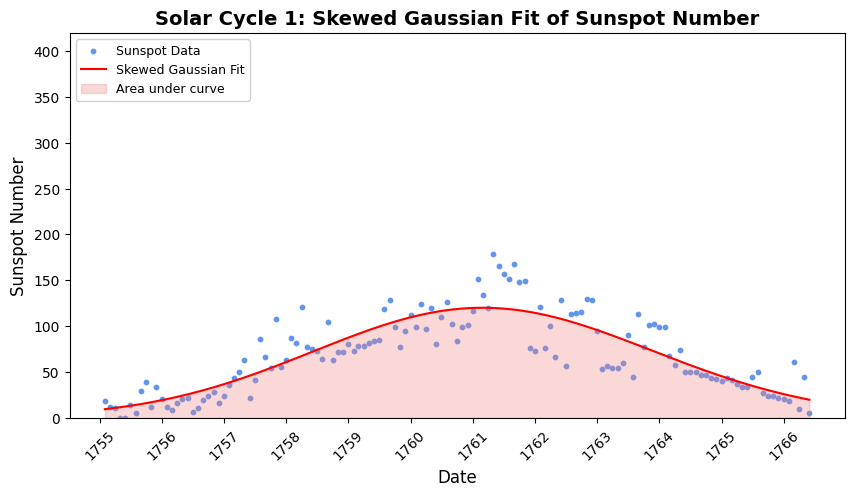


Cycle 2 Fitted Parameters:
A = 113.29, mu = 720.12, sigma = 1197.13, alpha = 2.43


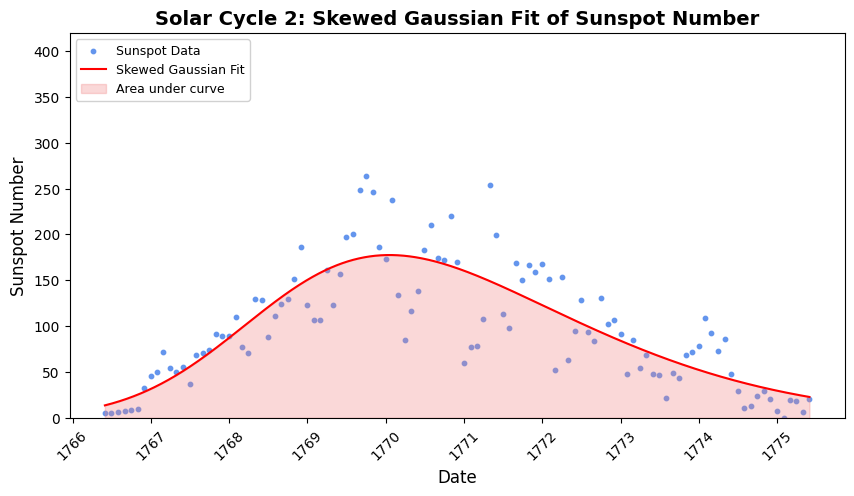


Cycle 3 Fitted Parameters:
A = 138.61, mu = 702.15, sigma = 1074.93, alpha = 5.49


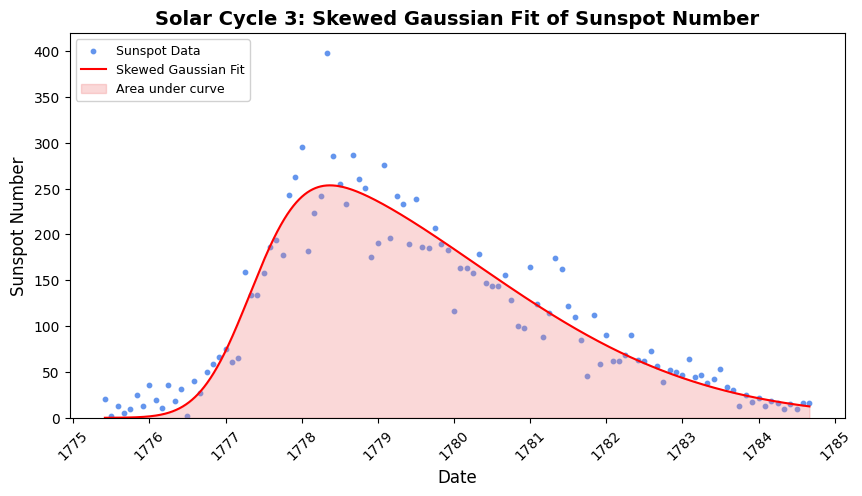


Cycle 4 Fitted Parameters:
A = 120.93, mu = 593.70, sigma = 1695.06, alpha = 5.82


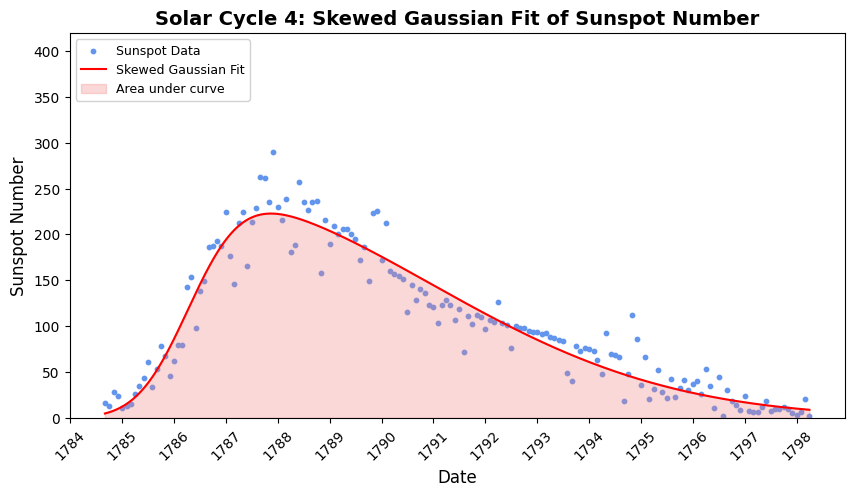


Cycle 5 Fitted Parameters:
A = 82.90, mu = 2108.80, sigma = 848.76, alpha = -0.10


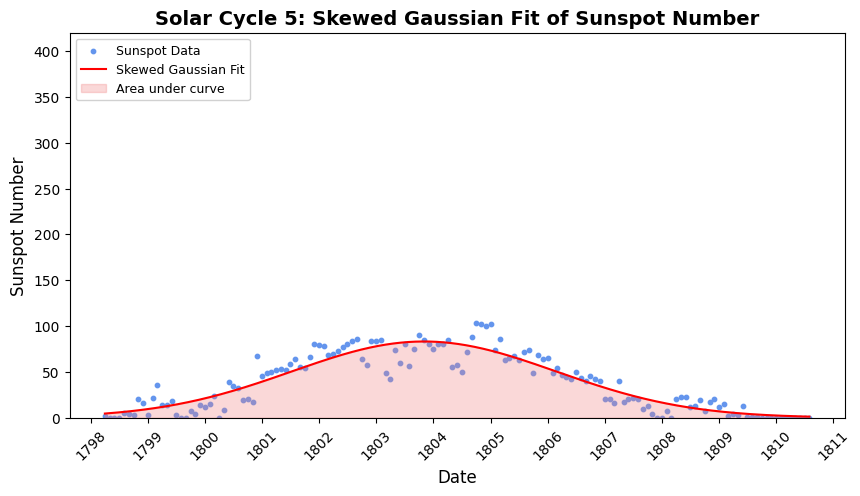


Cycle 6 Fitted Parameters:
A = 48.45, mu = 1626.30, sigma = 1163.40, alpha = 2.24


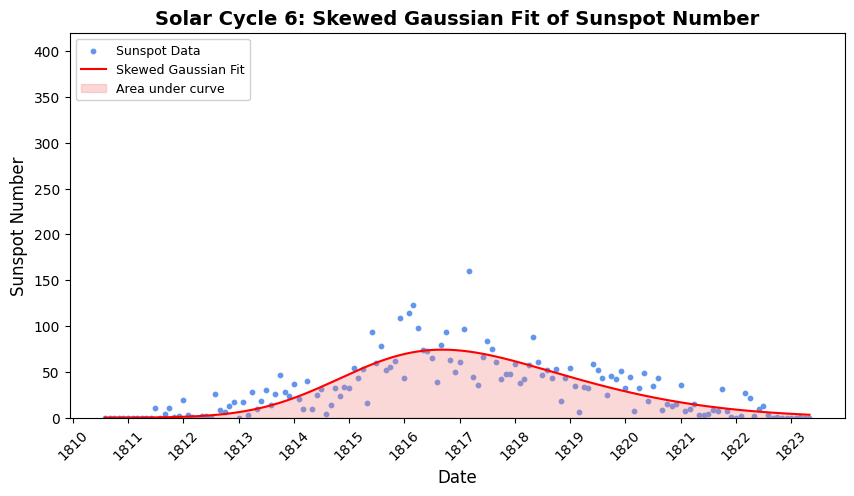


Cycle 7 Fitted Parameters:
A = 84.95, mu = 2929.70, sigma = 1177.13, alpha = -1.74


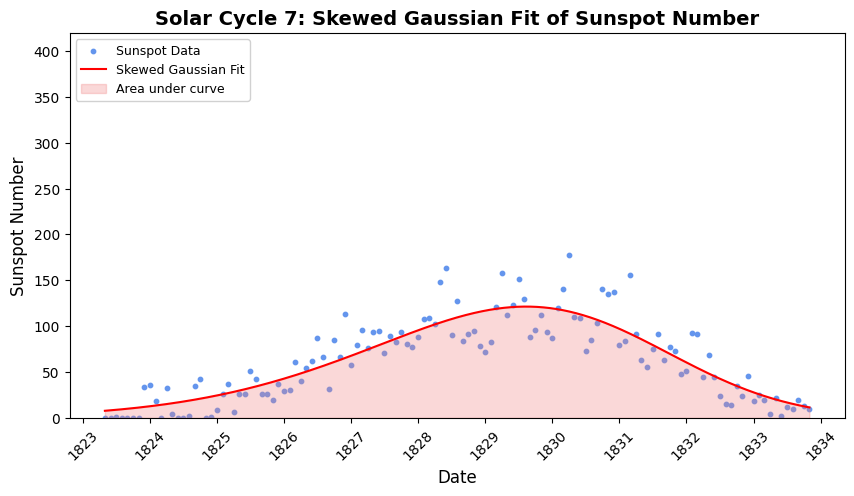


Cycle 8 Fitted Parameters:
A = 128.44, mu = 681.18, sigma = 1252.81, alpha = 4.64


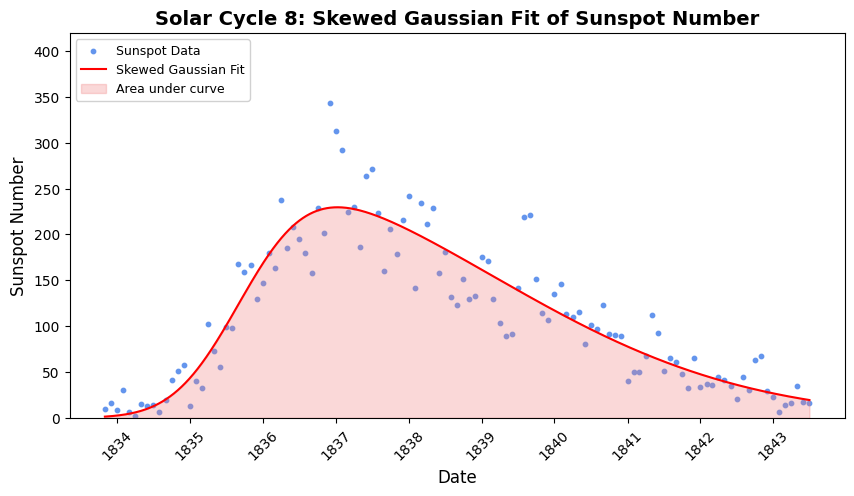


Cycle 9 Fitted Parameters:
A = 120.34, mu = 1123.00, sigma = 1523.43, alpha = 2.68


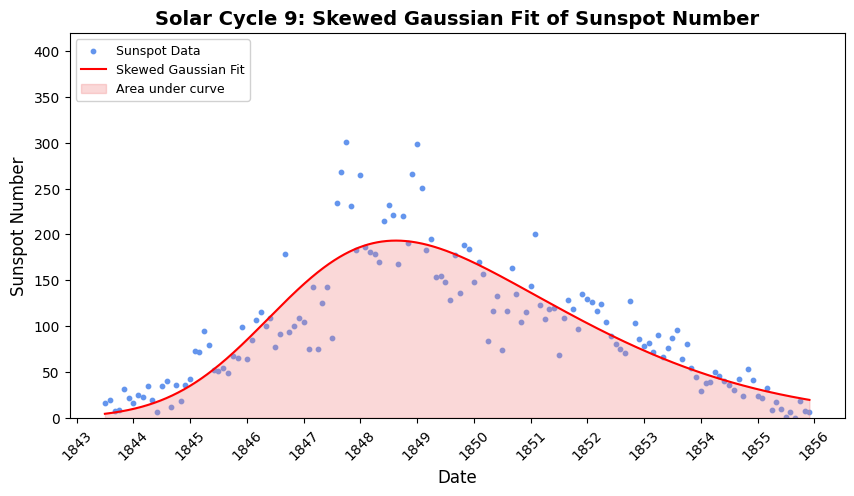


Cycle 10 Fitted Parameters:
A = 100.29, mu = 870.50, sigma = 1561.36, alpha = 4.57


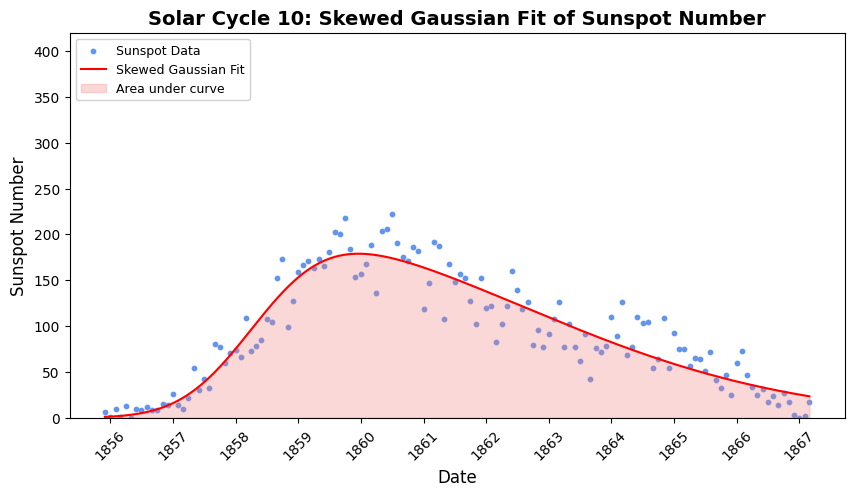


Cycle 11 Fitted Parameters:
A = 133.20, mu = 798.84, sigma = 1135.52, alpha = 2.86


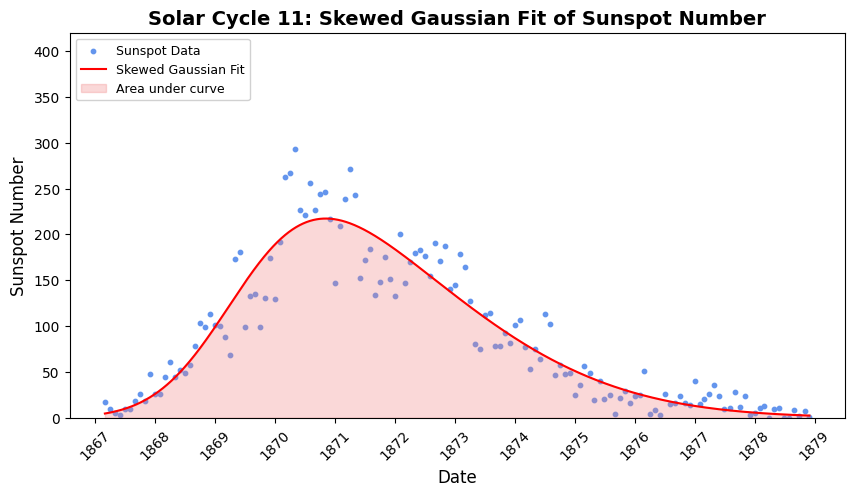


Cycle 12 Fitted Parameters:
A = 99.34, mu = 1177.84, sigma = 959.53, alpha = 0.84


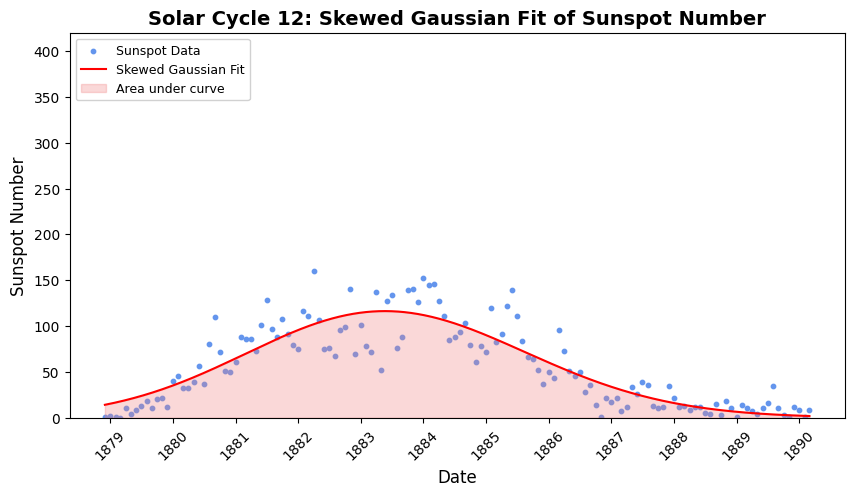


Cycle 13 Fitted Parameters:
A = 82.64, mu = 598.89, sigma = 1367.11, alpha = 3.84


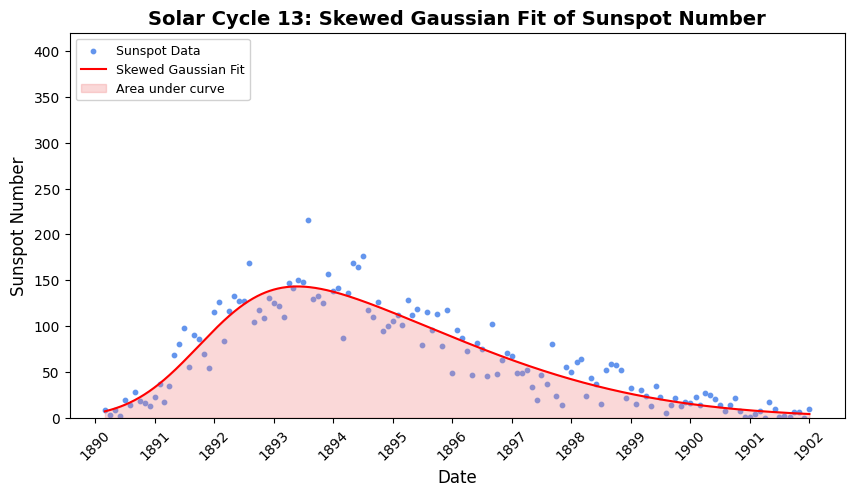


Cycle 14 Fitted Parameters:
A = 107.33, mu = 1756.95, sigma = 875.41, alpha = 0.00


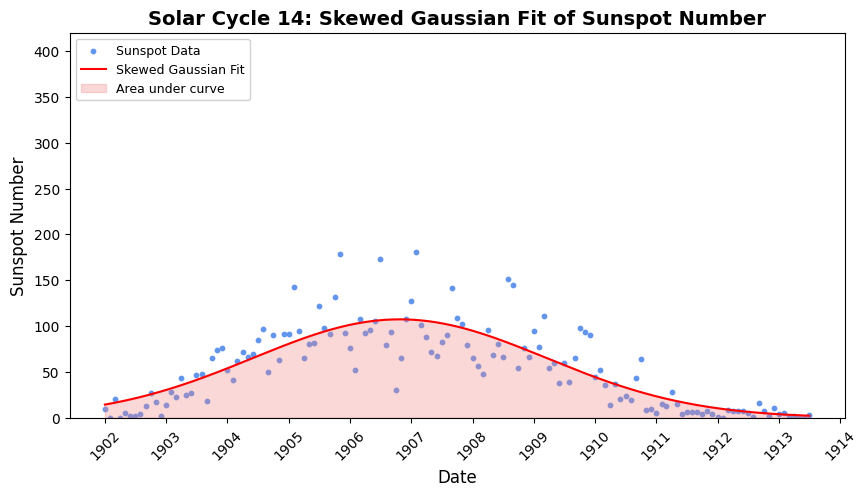


Cycle 15 Fitted Parameters:
A = 107.58, mu = 1015.25, sigma = 1013.29, alpha = 1.72


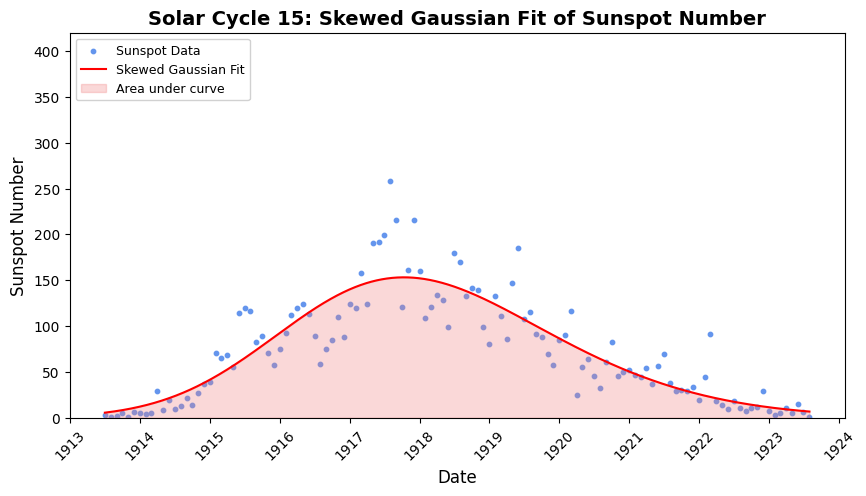


Cycle 16 Fitted Parameters:
A = 95.26, mu = 931.40, sigma = 1085.73, alpha = 1.52


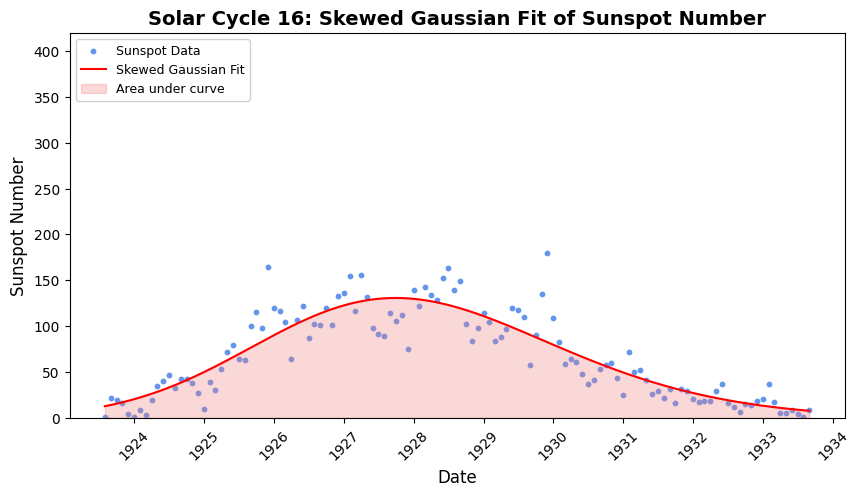


Cycle 17 Fitted Parameters:
A = 112.71, mu = 902.37, sigma = 1331.71, alpha = 3.56


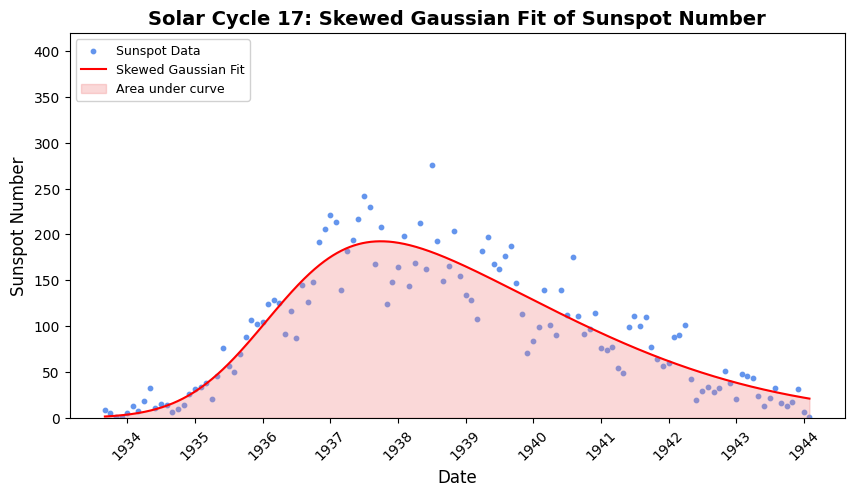


Cycle 18 Fitted Parameters:
A = 135.15, mu = 815.15, sigma = 1225.75, alpha = 2.92


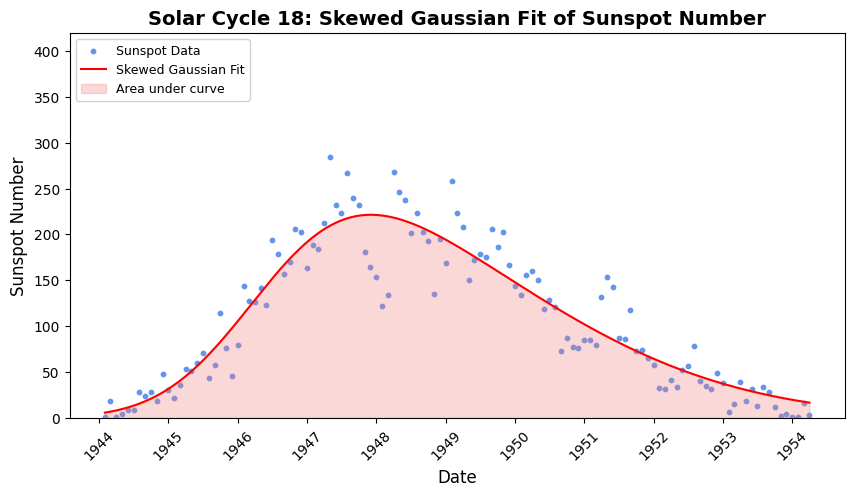


Cycle 19 Fitted Parameters:
A = 173.05, mu = 776.84, sigma = 1153.13, alpha = 3.22


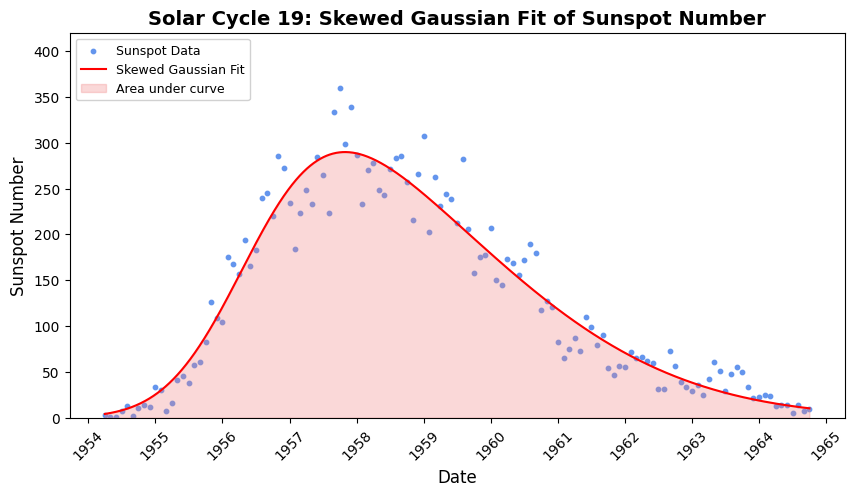


Cycle 20 Fitted Parameters:
A = 93.37, mu = 769.05, sigma = 1614.11, alpha = 3.58


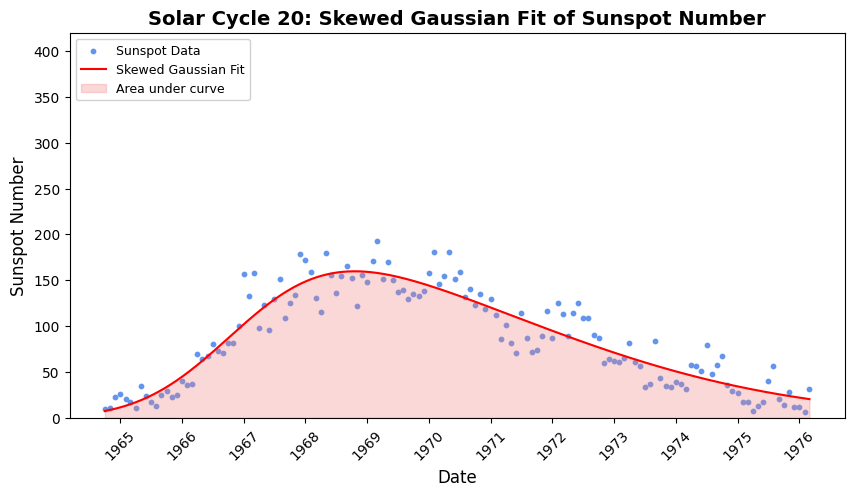


Cycle 21 Fitted Parameters:
A = 151.27, mu = 932.85, sigma = 1148.07, alpha = 2.36


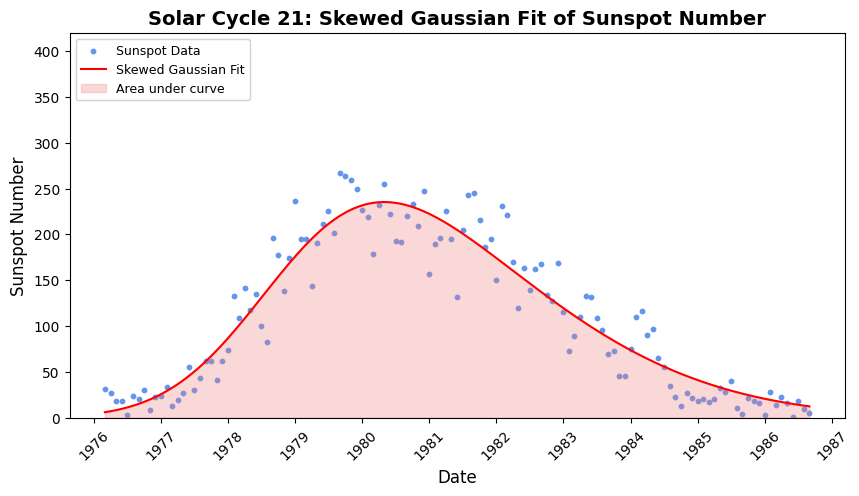


Cycle 22 Fitted Parameters:
A = 136.78, mu = 713.83, sigma = 1145.00, alpha = 2.92


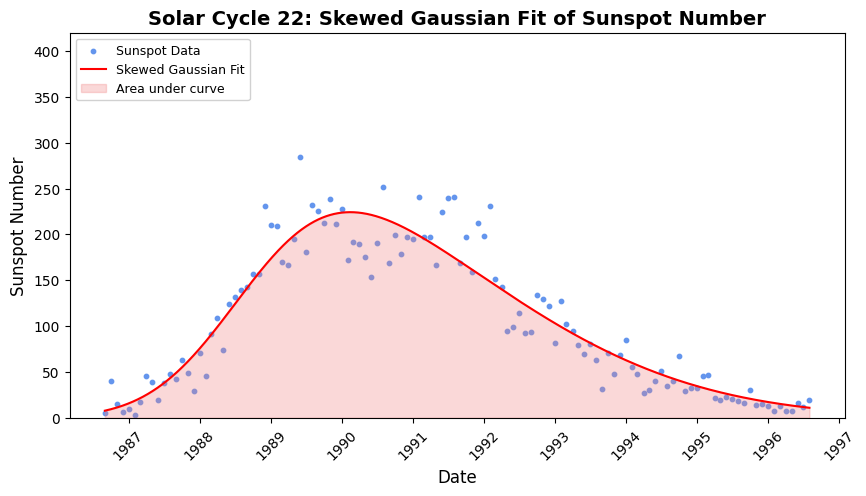


Cycle 23 Fitted Parameters:
A = 179.73, mu = 1712.26, sigma = 829.15, alpha = 0.00


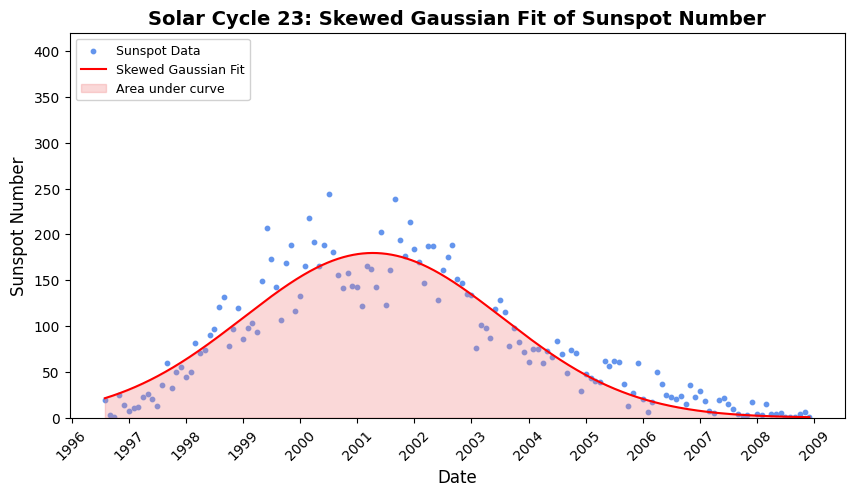


Cycle 24 Fitted Parameters:
A = 108.49, mu = 1731.25, sigma = 745.59, alpha = 0.00


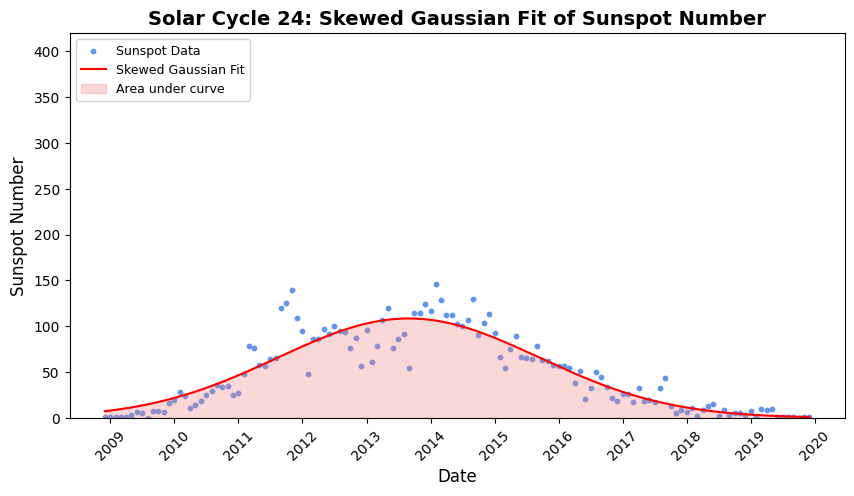

In [14]:
results = []
for cycle in solar_cycles:
    start_date = cycle['Start Date']
    end_date = cycle['End Date']
    cycle_num = cycle['Cycle Number']

    def skewed_gauss(x, A, mu, sigma, alpha):
        t = (x - mu) / sigma
        return A * np.exp(-0.5 * t**2) * (1 + erf(alpha * t / np.sqrt(2)))

    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)].dropna(subset=['SN'])
    x = (filtered_df['date'] - filtered_df['date'].min()).dt.days.values
    y = filtered_df['SN'].values
    mean_sn=np.mean(y)

    p0 = [max(y), np.median(x), np.std(x), 2]  # A, mu, sigma, alpha
    bounds = ([0, min(x), 0, -10], [np.inf, max(x), np.inf, 10])

    try:
        params, _ = curve_fit(skewed_gauss, x, y, p0=p0, bounds=bounds, maxfev=10000)
        A, mu, sigma, alpha = params

        x_fit = np.linspace(min(x), max(x), 10000)
        y_fit = skewed_gauss(x_fit, A, mu, sigma, alpha)
        dx = x_fit[1] - x_fit[0]

        cum_area = np.cumsum(y_fit) * dx
        total_area = cum_area[-1]
        cum_area_norm = cum_area / total_area

        skewness = skew(y)
        kurt = kurtosis(y)

        def find_bounds(cum_area, x_fit, level):
            lower_idx = np.argmax(cum_area >= (1 - level) / 2)
            upper_idx = np.argmax(cum_area >= 1 - (1 - level) / 2)
            return x_fit[lower_idx], x_fit[upper_idx]

        x_lower_1sigma, x_upper_1sigma = find_bounds(cum_area_norm, x_fit, 0.6827)
        x_lower_2sigma, x_upper_2sigma = find_bounds(cum_area_norm, x_fit, 0.9545)

        start_ref = filtered_df['date'].min()
        mu_date = start_ref + pd.to_timedelta(mu, unit='D')
        date_lower_1 = start_ref + pd.to_timedelta(x_lower_1sigma, unit='D')
        date_upper_1 = start_ref + pd.to_timedelta(x_upper_1sigma, unit='D')
        date_lower_2 = start_ref + pd.to_timedelta(x_lower_2sigma, unit='D')
        date_upper_2 = start_ref + pd.to_timedelta(x_upper_2sigma, unit='D')

        width_1sigma = x_upper_1sigma - x_lower_1sigma
        width_2sigma = x_upper_2sigma - x_lower_2sigma
        width_1sigma_years = width_1sigma / 365.25
        width_2sigma_years = width_2sigma / 365.25


        area_simpson = simpson(y_fit, x=x_fit)

        print(f"\nCycle {cycle_num} Fitted Parameters:")
        print(f"A = {A:.2f}, mu = {mu:.2f}, sigma = {sigma:.2f}, alpha = {alpha:.2f}")


        results.append({
        'Cycle Number': cycle_num,
        'Skewness (Data)': skewness,
        'Excess Kurtosis (Data)': kurt,
        'Total Area (Simpson)': area_simpson / 365.25,
        '1σ Width (years)': width_1sigma_years,
        '2σ Width (years)': width_2sigma_years,
        'Mean Sunspot Number ':mean_sn})

        plt.figure(figsize=(10, 5))
        plt.scatter(filtered_df['date'], y, label='Sunspot Data', color='cornflowerblue', s=10)
        x_dates = start_ref + pd.to_timedelta(x_fit, unit='D')
        plt.plot(x_dates, y_fit, label='Skewed Gaussian Fit', color='red')
        plt.fill_between(x_dates, y_fit, color='lightcoral', alpha=0.3, label='Area under curve')

        # plt.axvline(date_lower_1, color='green', linestyle='--', label='-1σ Bound')
        # plt.axvline(date_upper_1, color='green', linestyle='--', label='+1σ Bound')
        # plt.axvline(date_lower_2, color='purple', linestyle='--', label='-2σ Bound')
        # plt.axvline(date_upper_2, color='purple', linestyle='--', label='+2σ Bound')

        plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.xticks(rotation=45)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Sunspot Number", fontsize=12)
        plt.ylim(0, 420)
        plt.title(f"Solar Cycle {cycle_num}: Skewed Gaussian Fit of Sunspot Number", fontsize=14, weight='bold')
        plt.legend(loc='upper left', fontsize=9, frameon=True, framealpha=0.9)
        # plt.tight_layout()
        # plt.savefig(os.path.join(output_folder, f"cycle_{cycle_num}_fit_enhanced.png"), dpi=300, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"\nCycle {cycle_num} Error: {e}")


In [15]:
df_results = pd.DataFrame(results)
df_results

,Cycle Number,Skewness (Data),Excess Kurtosis (Data),Total Area (Simpson),1σ Width (years),2σ Width (years),Mean Sunspot Number
0,1,0.380462,-0.614505,287698.712111,5.154181,9.452919,69.063504
1,2,0.547792,-0.370726,326435.552841,4.077098,7.492679,98.232110
2,3,0.705874,-0.290939,368726.810032,3.506667,6.541336,110.375893
3,4,0.485517,-0.893247,508191.588165,5.545162,10.384108,102.656707
4,5,0.283223,-1.277815,174658.772254,4.570429,8.906541,38.171812
5,6,1.242990,1.864050,139979.103038,4.230021,8.303234,30.525325
6,7,0.336306,-0.734842,244532.227246,4.440964,8.458529,62.647244
7,8,0.564341,-0.482985,393951.241938,4.038102,7.407534,111.432479
8,9,0.756393,0.095324,447158.794491,5.194100,9.739868,98.856667
9,10,0.261535,-0.993755,377447.386096,4.889599,8.739864,91.615441


In [16]:
df_cycles = df_results.drop_duplicates(subset='Cycle Number')
df_odd = df_cycles[df_cycles['Cycle Number'] % 2 == 1]
df_even = df_cycles[df_cycles['Cycle Number'] % 2 == 0]
df_odd = df_odd.reset_index(drop=True)
df_even = df_even.reset_index(drop=True)

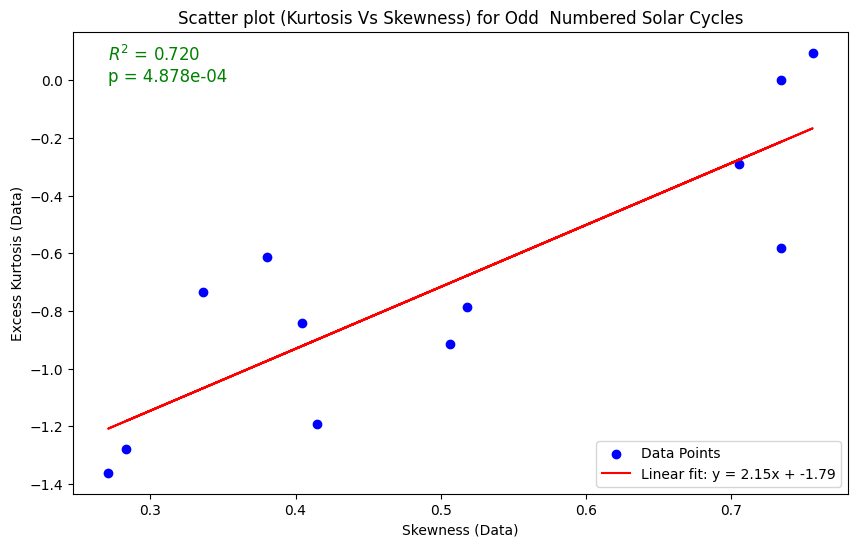

In [18]:
from scipy import stats
x = df_odd['Skewness (Data)']
y = df_odd['Excess Kurtosis (Data)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
# print("slope is given as:",slope)
# print("Intercept", intercept)
# print("R value",r_value)
# print("p value", p_value)
# print("Standard error", std_err)

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, line, color='red', label=f'Linear fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Skewness (Data)')
plt.ylabel('Excess Kurtosis (Data)')
plt.title('Scatter plot (Kurtosis Vs Skewness) for Odd  Numbered Solar Cycles')
plt.legend()

r_squared = r_value**2
plt.text(min(x), max(y)-0.1, f'$R^2$ = {r_squared:.3f}\np = {p_value:.3e}', fontsize=12, color='green')
plt.show()

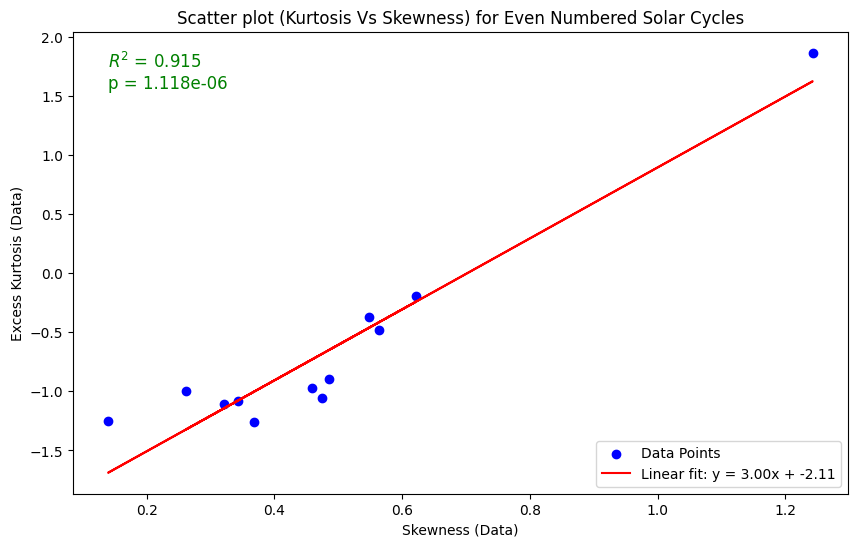

In [19]:
x = df_even['Skewness (Data)']
y = df_even['Excess Kurtosis (Data)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, line, color='red', label=f'Linear fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Skewness (Data)')
plt.ylabel('Excess Kurtosis (Data)')
plt.title('Scatter plot (Kurtosis Vs Skewness) for Even Numbered Solar Cycles')
plt.legend()
r_squared = r_value**2
plt.text(min(x), max(y)-0.3, f'$R^2$ = {r_squared:.3f}\np = {p_value:.3e}', fontsize=12, color='green')
plt.show()


Solar Cycle 25

In [ ]:
# Load the data
df = pd.read_csv("/home/ProjB2125/Desktop/Project/8thcopy/8thcopy.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
sc25org = df[(df['Date'] >= "2020-01-01") & (df['Date'] <= "2025-04-01")]
sc25pre = df[(df['Date'] >= "2025-03-01") & (df['Date'] <= "2030-01-01")]

In [ ]:
plt.plot(sc25pre['Date'], sc25pre['SN'], color='r', linestyle="--", label='Predicted Sunspot Number')
plt.plot(sc25org['Date'], sc25org['SN'], color='k', linestyle="-", label='Sunspot Number')
plt.title("Predicted Solar Cycle 25")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()